# 1 model

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, GRU, Activation
from keras.callbacks import TensorBoard
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
df_train = pd.read_csv('../train.csv')
df_train['dataset'] = 'train'
print(df_train.shape)
df_train.head()

(10886, 13)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dataset
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,train
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,train
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,train
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,train
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,train


In [3]:
df_test = pd.read_csv('../test.csv')
df_test['dataset'] = 'test'
df_test['datetime'] = pd.to_datetime(df_test['datetime'])
print(df_test.shape)
df_test.head()

(6493, 10)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dataset
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,test
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,test
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,test
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,test
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,test


In [4]:
df = df_train.copy().append(df_test.copy())
df.shape

(17379, 13)

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.index = df['datetime']
df = df.drop('datetime', axis=1)
drange = pd.date_range('2011-01-01 00:00:00', '2012-12-31 23:00:00', freq='H')
df = df.reindex(drange)
print(df.shape)
df.head()

(17544, 12)


,atemp,casual,count,dataset,holiday,humidity,registered,season,temp,weather,windspeed,workingday
2011-01-01 00:00:00,14.395,3.0,16.0,train,0.0,81.0,13.0,1.0,9.84,1.0,0.0,0.0
2011-01-01 01:00:00,13.635,8.0,40.0,train,0.0,80.0,32.0,1.0,9.02,1.0,0.0,0.0
2011-01-01 02:00:00,13.635,5.0,32.0,train,0.0,80.0,27.0,1.0,9.02,1.0,0.0,0.0
2011-01-01 03:00:00,14.395,3.0,13.0,train,0.0,75.0,10.0,1.0,9.84,1.0,0.0,0.0
2011-01-01 04:00:00,14.395,0.0,1.0,train,0.0,75.0,1.0,1.0,9.84,1.0,0.0,0.0


In [6]:
missing = df[pd.isnull(df['atemp'])]
missing.shape

(165, 12)

In [7]:
df['atemp'] = df['atemp'].interpolate(method='time')
df['holiday'] = df['holiday'].interpolate(method='time').apply(np.round)
df['humidity'] = df['humidity'].interpolate(method='time').apply(np.round)
df['season'] = df['season'].interpolate(method='time').apply(np.round)
df['temp'] = df['temp'].interpolate(method='time')
df['weather'] = df['weather'].interpolate(method='time').apply(np.round)
df['windspeed'] = df['windspeed'].interpolate(method='time')
df['workingday'] = df['workingday'].interpolate(method='time').apply(np.round)
df['casual'] = df['casual'].interpolate(method='time').apply(np.round)
df['registered'] = df['registered'].interpolate(method='time').apply(np.round)
df['count'] = df['count'].interpolate(method='time').apply(np.round)

In [8]:
df.loc[missing.index, 'dataset'] = 'train'
for year in [2011,2012]:
    for m in np.arange(1,13):
        df.loc[pd.datetime(year,m,20):pd.datetime(year,m,20)+pd.tseries.offsets.MonthEnd(),'dataset'] = 'test'
#         df = df.drop(df[df['dataset']=='train'].loc[pd.datetime(year,m,20):pd.datetime(year,m,20)+pd.tseries.offsets.MonthEnd()].index)
df.shape

(17544, 12)

In [9]:
df['month'] = df.index.month
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour
print(df.shape)
df.head()

(17544, 16)


,atemp,casual,count,dataset,holiday,humidity,registered,season,temp,weather,windspeed,workingday,month,day,dayofweek,hour
2011-01-01 00:00:00,14.395,3.0,16.0,train,0.0,81.0,13.0,1.0,9.84,1.0,0.0,0.0,1,1,5,0
2011-01-01 01:00:00,13.635,8.0,40.0,train,0.0,80.0,32.0,1.0,9.02,1.0,0.0,0.0,1,1,5,1
2011-01-01 02:00:00,13.635,5.0,32.0,train,0.0,80.0,27.0,1.0,9.02,1.0,0.0,0.0,1,1,5,2
2011-01-01 03:00:00,14.395,3.0,13.0,train,0.0,75.0,10.0,1.0,9.84,1.0,0.0,0.0,1,1,5,3
2011-01-01 04:00:00,14.395,0.0,1.0,train,0.0,75.0,1.0,1.0,9.84,1.0,0.0,0.0,1,1,5,4


In [10]:
# tax day
df.loc[pd.datetime(2011,4,15,0):pd.datetime(2011,4,15,23), 'workingday'] = 1
df.loc[pd.datetime(2011,4,15,0):pd.datetime(2011,4,15,23), 'holiday'] = 0
df.loc[pd.datetime(2012,4,16,0):pd.datetime(2012,4,16,23), 'workingday'] = 1
df.loc[pd.datetime(2012,4,16,0):pd.datetime(2012,4,16,23), 'holiday'] = 0

# thanksgiving friday
df.loc[pd.datetime(2011,11,25,0):pd.datetime(2011,11,25,23), 'workingday'] = 0
df.loc[pd.datetime(2011,11,25,0):pd.datetime(2011,11,25,23), 'holiday'] = 1
df.loc[pd.datetime(2012,11,23,0):pd.datetime(2012,11,23,23), 'workingday'] = 0
df.loc[pd.datetime(2012,11,23,0):pd.datetime(2012,11,23,23), 'holiday'] = 1

# christmas eve
df.loc[pd.datetime(2011,12,24,0):pd.datetime(2011,12,24,23), 'workingday'] = 0
df.loc[pd.datetime(2011,12,24,0):pd.datetime(2011,12,24,23), 'holiday'] = 1
df.loc[pd.datetime(2012,12,24,0):pd.datetime(2012,12,24,23), 'workingday'] = 0
df.loc[pd.datetime(2012,12,24,0):pd.datetime(2012,12,24,23), 'holiday'] = 1

# new year
df.loc[pd.datetime(2011,12,31,0):pd.datetime(2011,12,31,23), 'workingday'] = 0
df.loc[pd.datetime(2011,12,31,0):pd.datetime(2011,12,31,23), 'holiday'] = 1
df.loc[pd.datetime(2012,12,31,0):pd.datetime(2012,12,31,23), 'workingday'] = 0
df.loc[pd.datetime(2012,12,31,0):pd.datetime(2012,12,31,23), 'holiday'] = 1

In [11]:
cr_w_from = 7
cr_w_to = 23
cr_nw_from = 10
cr_nw_to = 19
rr_w_from1 = 7
rr_w_to1 = 9
rr_w_from2 = 12
rr_w_to2 = 21
rr_nw_from = 8
rr_nw_to = 23
df['casual_rush'] = df[['hour', 'workingday']].apply(
    lambda x: (0, 1)[
        (x['workingday'] == 1 and  cr_w_from <= x['hour'] <= cr_w_to)
        or (x['workingday'] == 0 and  cr_nw_from <= x['hour'] <= cr_nw_to)], axis = 1)
df['registered_rush'] = df[['hour', 'workingday']].apply(
    lambda x: (0, 1)[
#         (x['workingday'] == 1 and  rr_w_from1 <= x['hour'] <= rr_w_to2)
        (x['workingday'] == 1 and  (rr_w_from1 <= x['hour'] <= rr_w_to1 or rr_w_from2 <= x['hour'] <= rr_w_to2))
        or (x['workingday'] == 0 and rr_nw_from <= x['hour'] <= rr_nw_to)], axis = 1)
df.head()

,atemp,casual,count,dataset,holiday,humidity,registered,season,temp,weather,windspeed,workingday,month,day,dayofweek,hour,casual_rush,registered_rush
2011-01-01 00:00:00,14.395,3.0,16.0,train,0.0,81.0,13.0,1.0,9.84,1.0,0.0,0.0,1,1,5,0,0,0
2011-01-01 01:00:00,13.635,8.0,40.0,train,0.0,80.0,32.0,1.0,9.02,1.0,0.0,0.0,1,1,5,1,0,0
2011-01-01 02:00:00,13.635,5.0,32.0,train,0.0,80.0,27.0,1.0,9.02,1.0,0.0,0.0,1,1,5,2,0,0
2011-01-01 03:00:00,14.395,3.0,13.0,train,0.0,75.0,10.0,1.0,9.84,1.0,0.0,0.0,1,1,5,3,0,0
2011-01-01 04:00:00,14.395,0.0,1.0,train,0.0,75.0,1.0,1.0,9.84,1.0,0.0,0.0,1,1,5,4,0,0


In [12]:
features = ['humidity','atemp','temp','windspeed','weather','season','holiday','workingday','month','day','dayofweek','hour','casual_rush','registered_rush']

In [16]:
x_complete = df[df['dataset']=='train'][features]
y_complete = df[df['dataset']=='train']['count']
x_complete.shape, y_complete.shape

((10947, 14), (10947,))

Reshape functions

In [24]:
def reshape_training(x, y, ts):
    rows = 24*19*24-((ts-1)*24)
    dataX = np.zeros((rows, ts, x.shape[1]))
    dataY = np.zeros((rows))
    print(dataX.shape, dataY.shape)
    i = 0
    year = 2011
    m = 1
    d = 1
    h = 0
    while i < rows:
        idx = x.index.get_loc(pd.datetime(year,m,d,h))
        dataX[i] = x.ix[idx:idx+ts]
        dataY[i] = y.ix[idx+ts-1]
        i += 1
        h += 1
        if d == 19 and h > 23-ts+1:
            h = 0
            d = 1
            m += 1
            if m > 12:
                m = 1
                year += 1
        elif h > 23:
            h = 0
            d += 1
    return dataX, dataY

def reshape_testing(ts, features):
    dataX = np.zeros((len(df_test), ts, len(features)))
    i = 0
    for j, row in df_test.iterrows():
        idx = df.index.get_loc(row['datetime'])
        dataX[i] = df.ix[idx-ts+1:idx+1][features]
        i += 1
    return dataX

def write_preds(predictions, year, name):
    str_prediction = "datetime,count\n"
    tmp = df_test[(df_test['datetime'] >= str(year)+'-1-1') & (df_test['datetime'] < str(year+1)+'-1-1')]
    i = 0
    for j, row in tmp.iterrows():
        datetime = row['datetime']
        pred = predictions[i]
        str_prediction += "{},{}\n".format(datetime, pred)
        i += 1
    f = open('preds/'+name+'.csv','w')
    f.write(str_prediction)
    f.close()

Train models

In [36]:
time_steps = 21
n_features = x_complete.shape[1]

X, Y = reshape_training(x_complete, y_complete, time_steps)
scaler = StandardScaler()
scaler.fit(x_complete)
X_scaled = np.zeros((X.shape))
for i in np.arange(len(X)):
    X_scaled[i] = scaler.transform(X[i])
def model():
    model = Sequential()
    model.add(GRU(100, input_shape=(time_steps, n_features), return_sequences=True, activation='relu'))
    model.add(GRU(100, input_shape=(time_steps, n_features), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1))
    model.add(Activation('linear'))
    model.compile(loss='mean_squared_error', optimizer='RMSprop')
    return model
kr = KerasRegressor(build_fn=model, nb_epoch=100, batch_size=5, verbose=2)
%time kr.fit(X_scaled, Y, callbacks=[TensorBoard( \
            log_dir='logs/complete/g2d4_'+str(time_steps)+'_'+datetime.now().strftime('%Y%m%d-%H%M'))])

(10464, 21, 14) (10464,)
Epoch 1/100
49s - loss: 12465.4507
Epoch 2/100
49s - loss: 6446.9633
Epoch 3/100
53s - loss: 5077.1356
Epoch 4/100
50s - loss: 4130.3769
Epoch 5/100
49s - loss: 3365.5172
Epoch 6/100
49s - loss: 2761.4846
Epoch 7/100
51s - loss: 2397.9079
Epoch 8/100
48s - loss: 2092.9650
Epoch 9/100
50s - loss: 1929.4885
Epoch 10/100
50s - loss: 1693.1995
Epoch 11/100
49s - loss: 1522.3164
Epoch 12/100
52s - loss: 1408.5247
Epoch 13/100
49s - loss: 1317.5618
Epoch 14/100
50s - loss: 1248.1210
Epoch 15/100
49s - loss: 1199.9899
Epoch 16/100
52s - loss: 1134.2691
Epoch 17/100
51s - loss: 1098.8369
Epoch 18/100
51s - loss: 1039.9063
Epoch 19/100
51s - loss: 1017.5804
Epoch 20/100
53s - loss: 962.4240
Epoch 21/100
55s - loss: 910.9017
Epoch 22/100
50s - loss: 898.7123
Epoch 23/100
50s - loss: 856.2839
Epoch 24/100
50s - loss: 828.0940
Epoch 25/100
51s - loss: 794.1104
Epoch 26/100
50s - loss: 783.0659
Epoch 27/100
51s - loss: 770.9373
Epoch 28/100
50s - loss: 770.7777
Epoch 29/100

## Prediction

reshape

In [37]:
t_complete = reshape_testing(time_steps, features)
print(t_complete.shape)

(6493, 21, 14)


predict

In [38]:
t_scaled = np.zeros((t_complete.shape))
for i in np.arange(len(t_complete)):
    t_scaled[i] = scaler.transform(t_complete[i])
t_complete_pred = kr.predict(t_scaled)

write final prediction file

In [39]:
t_complete_pred[t_complete_pred < 0] = 0
test_pred = t_complete_pred
str_prediction = 'datetime,count\n'
for i in range(0, len(test_pred)):
    datetime = df_test['datetime'][i]
    pred = int(round(test_pred[i]))
    str_prediction += '{},{}\n'.format(datetime, pred)
f = open('pred.csv','w')
f.write(str_prediction)
f.close()

plots

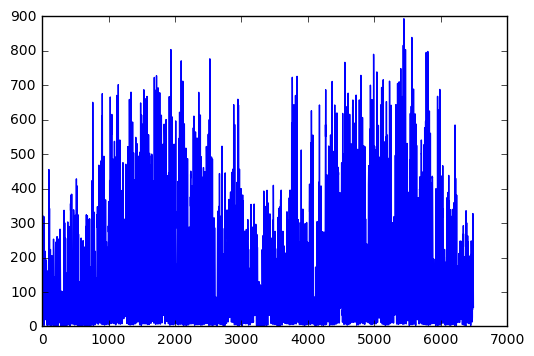

In [40]:
plt.plot(test_pred)

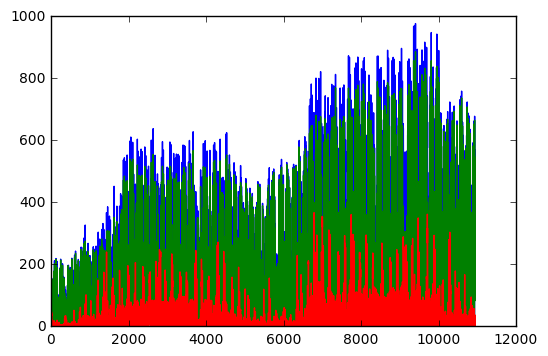

In [398]:
plt.plot(df[df['dataset']=='train']['count'].reset_index(drop=True))
plt.plot(df[df['dataset']=='train']['registered'].reset_index(drop=True))
plt.plot(df[df['dataset']=='train']['casual'].reset_index(drop=True))